In [ ]:
#d.trainX is a (60000,784) matrix which contains the pixel data for training
#d.trainY is a (1,60000) matrix which contains the labels for the training data
#d.testX is a (10000,784) matrix which contains the pixel data for testing
#d.testY is a (1,10000) matrix which contains the labels for the test set
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
!ls
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import metrics
import operator
from multiprocessing import Process
from multiprocessing import Pool

--2022-11-28 01:33:09--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2022-11-28 01:33:09--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2022-11-28 01:33:09--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
train:
 5


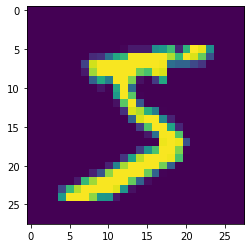

test:
 7


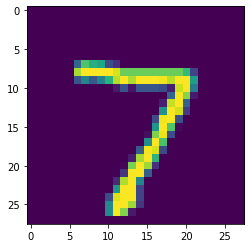

In [ ]:
data = sio.loadmat('mnist.mat?raw=true')
print(data)

train_X = data['trainX']  # shape = (60000, 768)
test_X = data['testX']  # shape = (10000, 784)

train_Y = data['trainY'][0]  # shape = (1, 60000)
test_Y = data['testY'][0]  # shape = (1, 10000)

print("train:\n",train_Y[0])
plt.imshow(train_X[0].reshape((28, 28)))
plt.show()

print("test:\n", test_Y[0])
plt.imshow(test_X[0].reshape((28, 28)))
plt.show()

#they are equal.

In [ ]:
def d(a, b):
  return np.sqrt(np.sum((a - b)**2))

In [ ]:
def get_K_nearest_neighbors(X, x, k):
  distances = np.array([d(X[i], x) for i in range(10000)])
  indices = np.argsort(distances)
  return train_Y[indices[:k]]

conf = np.zeros((10, 10))
def task(i):
  predicted_label = int(np.median(get_K_nearest_neighbors(train_X, test_X[i, :], 1)))
  true_label = test_Y[i]
  conf[true_label, predicted_label] += 1
  return (true_label, predicted_label)

with Pool() as pool:
  for result in pool.imap(task, range(100)):
    conf[result[0], result[1]] += 1

accuracy = np.sum([conf[i, i] for i in range(10)])/np.sum(np.sum(conf))

print("overall accuracy:", accuracy)

overall accuracy: 0.28


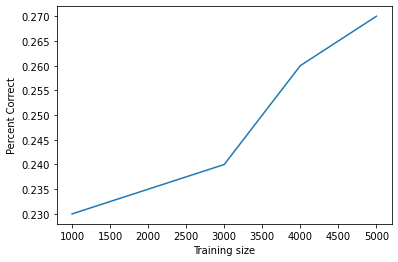

In [ ]:
#graph 1
#200 test samples
#changing training samples
#1000=0.23%
#2000=0.235%
#3000=0.24%
#4000=0.26%
#5000=0.27%

training = [1000, 2000, 3000, 4000, 5000]
percent_Correct = [0.23, 0.235, 0.24, 0.26,  0.27]

plt.plot(training, percent_Correct)
plt.xlabel("Training size")
plt.ylabel("Percent Correct")
plt.show()

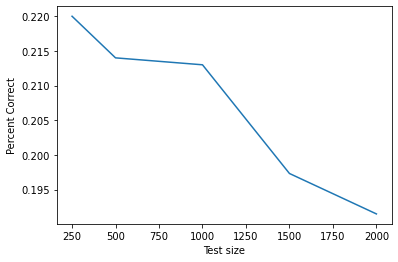

In [ ]:
#graph 2
#1000 training samples
#changing test samples
#250=0.22%
#500=0.214%
#1000=0.213%
#1500=0.19733333333333333%
#2000=0.1915%

test = [250, 500, 1000, 1500, 2000]
percent_Correct2 = [0.22, 0.214, 0.213, 0.19733, 0.1915]

plt.plot(test, percent_Correct2)
plt.xlabel("Test size")
plt.ylabel("Percent Correct")
plt.show()

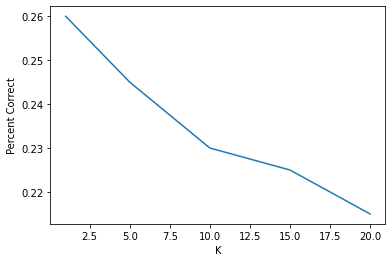

In [ ]:
#graph 3
#30000 training samples
#200 test samples
#k=1 percent=0.26%
#k=5 percent=0.245%
#k=10 percent=0.23%
#k=15 percent=0.225%
#k=20 percent=0.215%
# when more distances are 
k = [1, 5, 10, 15, 20]
percent = [0.26, 0.245, 0.23, 0.225, 0.215]

plt.plot(k, percent)
plt.xlabel("K")
plt.ylabel("Percent Correct")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


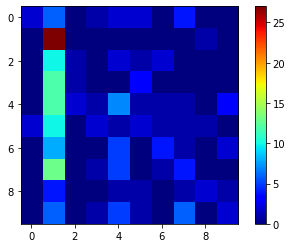

In [ ]:
#graph 4
plt.imshow(conf, cmap='jet')
plt.colorbar()

!pip install parfor